### mount gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/rna-binding')

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.6 MB/s eta 0:00:00


### data prep

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('final_attract_db_with_emb.csv')

In [ ]:
import pickle
# Load the dictionary back from the pickle file.
with open("rbp_seqs_dict.pkl", "rb") as f:
    rbp_seqs_dict = pickle.load(f)

In [ ]:
import numpy as np
rna_motif_emb = np.load('rna_motif_emb.npy', allow_pickle=True)

In [ ]:
len(rna_motif_emb[1])

7

In [ ]:
data = data.drop(columns=['rna_motif_emb', 'rbp_esm_emb'])

In [ ]:
data['rna_motif_emb'] = rna_motif_emb

In [ ]:
data['rbp_esm_emb'] = data['RBP_sequence'].map(rbp_seqs_dict)

In [ ]:
# Convert list of tensors to numpy array
def tensors_to_numpy(tensor_list):
    return np.stack([t.numpy() for t in tensor_list])

# Apply the conversion to the 'rbp_esm_emb' column
data['rbp_esm_emb'] = data['rbp_esm_emb'].apply(tensors_to_numpy)

In [ ]:
data

,Gene_name,Gene_id,Motif,RBP_sequence,rna_motif_emb,rbp_esm_emb
0,A1CF,ENSG00000148584,UGAUCAGUAUA,MESNHKSGDGLSGTQKEAALRALVQRTGYSLVQENGQRKYGGPPPG...,"[[0.02515462040901184, -0.1693081259727478, 1....","[[0.102689214, -0.18220823, -0.05008613, 0.156..."
1,A1CF,ENSG00000148584,AUAAUUA,MESNHKSGDGLSGTQKEAALRALVQRTGYSLVQENGQRKYGGPPPG...,"[[-0.005481339991092682, -0.008752591907978058...","[[0.102689214, -0.18220823, -0.05008613, 0.156..."
2,A1CF,ENSG00000148584,UUAAUUA,MESNHKSGDGLSGTQKEAALRALVQRTGYSLVQENGQRKYGGPPPG...,"[[-0.006157027557492256, -0.04564734920859337,...","[[0.102689214, -0.18220823, -0.05008613, 0.156..."
3,A1CF,ENSG00000148584,AUAAUUG,MESNHKSGDGLSGTQKEAALRALVQRTGYSLVQENGQRKYGGPPPG...,"[[0.0016195997595787048, 0.0697508156299591, 1...","[[0.102689214, -0.18220823, -0.05008613, 0.156..."
4,A1CF,ENSG00000148584,UUAAUUG,MESNHKSGDGLSGTQKEAALRALVQRTGYSLVQENGQRKYGGPPPG...,"[[0.02757852151989937, 0.006868686527013779, 3...","[[0.102689214, -0.18220823, -0.05008613, 0.156..."
...,...,...,...,...,...,...
3247,SRSF1,ENSG00000136450,CGGCGGU,MSGGGVIRGPAGNNDCRIYVGNLPPDIRTKDIEDVFYKYGAIRDID...,"[[0.03172174096107483, -0.21967869997024536, -...","[[0.19127601, -0.11130471, 0.0977051, 0.116294..."
3248,SRSF2,ENSG00000161547,GAAAGGAGA,MSYGRPPPDVEGMTSLKVDNLTYRTSPDTLRRVFEKYGRVGDVYIP...,"[[0.013123728334903717, -0.012446027249097824,...","[[0.26023224, -0.14764462, 0.03352632, 0.18112..."
3249,HNRNPAB,ENSG00000197451,AUAGCA,MSEAGEEQPMETTGATENGHEAVPEASRGRGWTGAAAGAGGATAAP...,"[[-0.0034322012215852737, 0.000896155834197998...","[[0.019191047, 0.034460854, 0.13640618, 0.1387..."
3250,HNRNPA1,ENSG00000135486,UAGG,MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVM...,"[[0.11391925066709518, -0.08793018758296967, 7...","[[0.14509255, -0.06513151, -0.03306822, 0.0129..."


In [ ]:
average_length = data['RBP_sequence'].apply(len).mean()
print(f"Average length of RBP_sequence: {average_length}")


Average length of RBP_sequence: 415.5270602706027


In [ ]:
data = data[data['RBP_sequence'].apply(len) <= 600]


In [ ]:
average_length = data['RBP_sequence'].apply(len).mean()
print(f"Average length of RBP_sequence: {average_length}")


Average length of RBP_sequence: 346.6694334175388


In [ ]:
max_rbp_sequence_length = data['RBP_sequence'].apply(len).max()
max_motif_length = data['Motif'].apply(len).max()

print(f"Maximum RBP sequence length: {max_rbp_sequence_length}")
print(f"Maximum Motif length: {max_motif_length}")

# Use these lengths for padding
max_encoder_seq_length = max_motif_length
max_decoder_seq_length = max_rbp_sequence_length

Maximum RBP sequence length: 599
Maximum Motif length: 12


In [ ]:
import numpy as np
import ast

### seq2seq model

In [ ]:
data.columns

Index(['Gene_name', 'Gene_id', 'Motif', 'RBP_sequence', 'rna_motif_emb',
       'rbp_esm_emb'],
      dtype='object')

In [ ]:
print(data['rna_motif_emb'][1].shape)
print(data['rbp_esm_emb'][1].shape)

(7, 120)
(594, 1280)


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Checking the GPU availability
if not torch.cuda.is_available():
    raise SystemError('GPU device not found')
print(f"Using device: {device}")


Using device: cuda


#### one dataloader -- no train/test split
#### testing for overfitting

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Convert sequences to tensors and filter sequences with a length of up to 600
data = data[data['RBP_sequence'].apply(len) <= 600]

class Seq2SeqDataset(Dataset):
    def __init__(self, encoder_data, decoder_data, decoder_target):
        self.encoder_data = encoder_data
        self.decoder_data = decoder_data
        self.decoder_target = decoder_target

    def __len__(self):
        return len(self.encoder_data)

    def __getitem__(self, idx):
        return self.encoder_data[idx], self.decoder_data[idx], self.decoder_target[idx]

def pad_collate(batch):
    (encoder_seqs, decoder_seqs, decoder_targets) = zip(*batch)

    encoder_seqs_padded = torch.nn.utils.rnn.pad_sequence(encoder_seqs, batch_first=True, padding_value=0)
    decoder_seqs_padded = torch.nn.utils.rnn.pad_sequence(decoder_seqs, batch_first=True, padding_value=0)
    decoder_targets_padded = torch.nn.utils.rnn.pad_sequence(decoder_targets, batch_first=True, padding_value=0)

    return encoder_seqs_padded, decoder_seqs_padded, decoder_targets_padded

encoder_input_list = [torch.tensor(seq, dtype=torch.float32) for seq in data['rna_motif_emb'].tolist()]
decoder_input_list = [torch.tensor(seq, dtype=torch.float32) for seq in data['rbp_esm_emb'].tolist()]
decoder_target_list = [torch.tensor(np.roll(seq, shift=-1, axis=0), dtype=torch.float32) for seq in data['rbp_esm_emb'].tolist()]

dataset = Seq2SeqDataset(encoder_input_list, decoder_input_list, decoder_target_list)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=pad_collate)


In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder_input_dim, decoder_input_dim, latent_dim, dropout_rate=0.5):
        super(Seq2Seq, self).__init__()

        # Encoder
        self.encoder = nn.LSTM(encoder_input_dim, latent_dim, num_layers=2, dropout=dropout_rate, batch_first=True, bidirectional=True)

        # Decoder
        self.decoder = nn.LSTM(decoder_input_dim, latent_dim*2, num_layers=2, dropout=dropout_rate, batch_first=True)

        # Batch normalization for LSTM outputs
        self.decoder_bn = nn.BatchNorm1d(latent_dim*2)  # For bidirectional outputs

        # Final output layer
        self.fc = nn.Linear(latent_dim*2, decoder_input_dim)

    def forward(self, encoder_input, decoder_input):
        _, (h, c) = self.encoder(encoder_input)

        # For bidirectional LSTM, concatenate the states from the forward and backward passes
        h = torch.cat([h[0:h.size(0):2], h[1:h.size(0):2]], dim=2)
        c = torch.cat([c[0:c.size(0):2], c[1:c.size(0):2]], dim=2)

        # Use h and c as initial states for the decoder
        decoder_output, _ = self.decoder(decoder_input, (h, c))

        # Apply batch normalization over the LSTM's output features
        decoder_output = decoder_output.permute(0, 2, 1)
        decoder_output = self.decoder_bn(decoder_output)
        decoder_output = decoder_output.permute(0, 2, 1)

        return self.fc(decoder_output)

encoder_input_dim = 120  # rna_motif_emb embedding dimension
decoder_input_dim = 1280  # rbp_esm_emb embedding dimension
latent_dim = 256  # size of the context vector

model = Seq2Seq(encoder_input_dim, decoder_input_dim, latent_dim).to(device)
criterion = nn.MSELoss()

# Adam optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, verbose=True)

# Training Loop
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    for encoder_input, decoder_input, decoder_target in dataloader:
        encoder_input, decoder_input, decoder_target = encoder_input.to(device), decoder_input.to(device), decoder_target.to(device)
        optimizer.zero_grad()
        outputs = model(encoder_input, decoder_input)
        loss = criterion(outputs, decoder_target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    scheduler.step(avg_loss)  # Adjust learning rate based on the average loss
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")


Epoch 1/10, Loss: 0.0268
Epoch 2/10, Loss: 0.0164
Epoch 3/10, Loss: 0.0151
Epoch 4/10, Loss: 0.0131
Epoch 5/10, Loss: 0.0121
Epoch 6/10, Loss: 0.0114
Epoch 7/10, Loss: 0.0106
Epoch 8/10, Loss: 0.0103
Epoch 9/10, Loss: 0.0097
Epoch 10/10, Loss: 0.0093


#### train/test split -- v1 -- generate esm-2 embedding

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

# 1. Dataset and DataLoader:
class Seq2SeqDataset(Dataset):
    def __init__(self, encoder_data, decoder_data, decoder_target):
        self.encoder_data = encoder_data
        self.decoder_data = decoder_data
        self.decoder_target = decoder_target

    def __len__(self):
        return len(self.encoder_data)

    def __getitem__(self, idx):
        return self.encoder_data[idx], self.decoder_data[idx], self.decoder_target[idx]

def pad_collate(batch):
    (encoder_seqs, decoder_seqs, decoder_targets) = zip(*batch)

    encoder_seqs_padded = torch.nn.utils.rnn.pad_sequence(encoder_seqs, batch_first=True, padding_value=0)
    decoder_seqs_padded = torch.nn.utils.rnn.pad_sequence(decoder_seqs, batch_first=True, padding_value=0)
    decoder_targets_padded = torch.nn.utils.rnn.pad_sequence(decoder_targets, batch_first=True, padding_value=0)

    return encoder_seqs_padded, decoder_seqs_padded, decoder_targets_padded

encoder_input_list = [torch.tensor(seq, dtype=torch.float32) for seq in data['rna_motif_emb'].tolist()]
decoder_input_list = [torch.tensor(seq, dtype=torch.float32) for seq in data['rbp_esm_emb'].tolist()]
decoder_target_list = [torch.tensor(np.roll(seq, shift=-1, axis=0), dtype=torch.float32) for seq in data['rbp_esm_emb'].tolist()]

dataset = Seq2SeqDataset(encoder_input_list, decoder_input_list, decoder_target_list)

# Splitting the dataset into training and test/validation sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=pad_collate)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=pad_collate)

# 2. Model Definition and Training Loop:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



class Seq2Seq(nn.Module):
    def __init__(self, encoder_input_dim, decoder_input_dim, latent_dim, dropout_rate=0.5):
        super(Seq2Seq, self).__init__()

        # Encoder
        self.encoder = nn.LSTM(encoder_input_dim, latent_dim, num_layers=2, dropout=dropout_rate, batch_first=True, bidirectional=True)

        # Decoder
        self.decoder = nn.LSTM(decoder_input_dim, latent_dim*2, num_layers=2, dropout=dropout_rate, batch_first=True)

        # Batch normalization for LSTM outputs
        self.decoder_bn = nn.BatchNorm1d(latent_dim*2)  # For bidirectional outputs

        # Final output layer
        self.fc = nn.Linear(latent_dim*2, decoder_input_dim)

    def forward(self, encoder_input, decoder_input):
        _, (h, c) = self.encoder(encoder_input)

        # For bidirectional LSTM, concatenate the states from the forward and backward passes
        h = torch.cat([h[0:h.size(0):2], h[1:h.size(0):2]], dim=2)
        c = torch.cat([c[0:c.size(0):2], c[1:c.size(0):2]], dim=2)

        # Use h and c as initial states for the decoder
        decoder_output, _ = self.decoder(decoder_input, (h, c))

        # Apply batch normalization over the LSTM's output features
        decoder_output = decoder_output.permute(0, 2, 1)
        decoder_output = self.decoder_bn(decoder_output)
        decoder_output = decoder_output.permute(0, 2, 1)

        return self.fc(decoder_output)

encoder_input_dim = 120  # rna_motif_emb embedding dimension
decoder_input_dim = 1280  # rbp_esm_emb embedding dimension
latent_dim = 256  # size of the context vector

model = Seq2Seq(encoder_input_dim, decoder_input_dim, latent_dim).to(device)
criterion = nn.MSELoss()

# Adam optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, verbose=True)

# Model definition (as provided before)
model = Seq2Seq(encoder_input_dim, decoder_input_dim, latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, verbose=True)

epochs = 10
for epoch in range(epochs):
    # Training
    model.train()
    total_loss = 0
    for encoder_input, decoder_input, decoder_target in train_dataloader:
        encoder_input, decoder_input, decoder_target = encoder_input.to(device), decoder_input.to(device), decoder_target.to(device)
        optimizer.zero_grad()
        outputs = model(encoder_input, decoder_input)
        loss = criterion(outputs, decoder_target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Evaluation
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for encoder_input, decoder_input, decoder_target in test_dataloader:
            encoder_input, decoder_input, decoder_target = encoder_input.to(device), decoder_input.to(device), decoder_target.to(device)
            outputs = model(encoder_input, decoder_input)
            loss = criterion(outputs, decoder_target)
            total_test_loss += loss.item()

    avg_train_loss = total_loss / len(train_dataloader)
    avg_test_loss = total_test_loss / len(test_dataloader)
    scheduler.step(avg_test_loss)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")


Epoch 1/10, Train Loss: 0.0282, Test Loss: 0.0195
Epoch 2/10, Train Loss: 0.0172, Test Loss: 0.0149
Epoch 3/10, Train Loss: 0.0150, Test Loss: 0.0143
Epoch 4/10, Train Loss: 0.0136, Test Loss: 0.0116
Epoch 5/10, Train Loss: 0.0188, Test Loss: 0.0133
Epoch 6/10, Train Loss: 0.0144, Test Loss: 0.0123
Epoch 7/10, Train Loss: 0.0133, Test Loss: 0.0110
Epoch 8/10, Train Loss: 0.0125, Test Loss: 0.0104
Epoch 9/10, Train Loss: 0.0120, Test Loss: 0.0100
Epoch 10/10, Train Loss: 0.0115, Test Loss: 0.0095


#### incorporating sequence+curriculum learning -- output sequences

In [ ]:
import pandas as pd
from tqdm import tqdm

In [ ]:
!pip install fair-esm
##setting up ESM
import torch
import esm
esm_model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
esm_model.eval()  # disables dropout for deterministic results
esm_model.cuda() #push model to gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.4 MB/s eta 0:00:00


Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt


ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0-32): 33 x TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
  )
  (contact_head): ContactPredictionHead(
    (regression): Linear(in_features=660, out_features=1, bias=True)
    (activation): Sigmoid()
  )
  (emb_layer_norm_after): LayerNorm((1280,), eps=1

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

# 1. Dataset and DataLoader:
class Seq2SeqDataset(Dataset):
    def __init__(self, encoder_data, decoder_data, decoder_target):
        self.encoder_data = encoder_data
        self.decoder_data = decoder_data
        self.decoder_target = decoder_target

    def __len__(self):
        return len(self.encoder_data)

    def __getitem__(self, idx):
        return self.encoder_data[idx], self.decoder_data[idx], self.decoder_target[idx]

def pad_collate(batch):
    (encoder_seqs, decoder_seqs, decoder_targets) = zip(*batch)

    encoder_seqs_padded = torch.nn.utils.rnn.pad_sequence(encoder_seqs, batch_first=True, padding_value=0)
    decoder_seqs_padded = torch.nn.utils.rnn.pad_sequence(decoder_seqs, batch_first=True, padding_value=0)
    decoder_targets_padded = torch.nn.utils.rnn.pad_sequence(decoder_targets, batch_first=True, padding_value=0)

    return encoder_seqs_padded, decoder_seqs_padded, decoder_targets_padded

encoder_input_list = [torch.tensor(seq, dtype=torch.float32) for seq in data['rna_motif_emb'].tolist()]
decoder_input_list = [torch.tensor(seq, dtype=torch.float32) for seq in data['rbp_esm_emb'].tolist()]
decoder_target_list = [torch.tensor(np.roll(seq, shift=-1, axis=0), dtype=torch.float32) for seq in data['rbp_esm_emb'].tolist()]

dataset = Seq2SeqDataset(encoder_input_list, decoder_input_list, decoder_target_list)

# Splitting the dataset into training and test/validation sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=pad_collate)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=pad_collate)

# 2. Model Definition and Training Loop:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# Embeddings to Sequence Function:
def embeddings_to_sequence_batch(embeddings, esm_model, alphabet):
    aa_toks = alphabet.all_toks
    aa_idxs = [alphabet.get_idx(aa) for aa in aa_toks]
    embeddings = embeddings.to(device)
    aa_logits = esm_model.lm_head(embeddings)[:, :, aa_idxs]
    predictions = torch.argmax(aa_logits, dim=-1)
    all_decoded_sequences = []
    for idx in range(predictions.size(0)):
        decoded_seq = ''.join([aa_toks[pred] for pred in predictions[idx]])
        all_decoded_sequences.append(decoded_seq)
    return all_decoded_sequences


In [ ]:

class Seq2SeqWithDecoding(nn.Module):
    def __init__(self, encoder_input_dim, decoder_input_dim, latent_dim, dropout_rate=0.5):
        super(Seq2SeqWithDecoding, self).__init__()
        # Encoder
        self.encoder = nn.LSTM(encoder_input_dim, latent_dim, num_layers=2, dropout=dropout_rate, batch_first=True, bidirectional=True)
        # Decoder
        self.decoder = nn.LSTM(decoder_input_dim, latent_dim*2, num_layers=2, dropout=dropout_rate, batch_first=True)
        # Batch normalization for LSTM outputs
        self.decoder_bn = nn.BatchNorm1d(latent_dim*2)  # For bidirectional outputs
        # Final output layer
        self.fc = nn.Linear(latent_dim*2, decoder_input_dim)

    def forward(self, encoder_input, decoder_input):
        _, (h, c) = self.encoder(encoder_input)

        # For bidirectional LSTM, concatenate the states from the forward and backward passes
        h = torch.cat([h[0:h.size(0):2], h[1:h.size(0):2]], dim=2)
        c = torch.cat([c[0:c.size(0):2], c[1:c.size(0):2]], dim=2)
        # Use h and c as initial states for the decoder
        decoder_output, _ = self.decoder(decoder_input, (h, c))
        # Apply batch normalization over the LSTM's output features
        decoder_output = decoder_output.permute(0, 2, 1)
        decoder_output = self.decoder_bn(decoder_output)
        decoder_output = decoder_output.permute(0, 2, 1)

        return self.fc(decoder_output)

        encoder_input_dim = 120  # rna_motif_emb embedding dimension
        decoder_input_dim = 1280  # rbp_esm_emb embedding dimension
        latent_dim = 256  # size of the context vector


    def decode_sequence(self, embeddings, esm_model, alphabet):
        return embeddings_to_sequence_batch(embeddings, esm_model, alphabet)

    def sequence_loss(self, decoded_sequences):
        return sum([1 if seq[0] != 'M' else 0 for seq in decoded_sequences])


In [ ]:
from transformers import AutoModel, AutoTokenizer

model_name = "facebook/esm2_t33_650M_UR50D"
esm_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

class Seq2SeqWithESMDecoding(nn.Module):
    def __init__(self, encoder_input_dim, latent_dim, model_name):
        super(Seq2SeqWithESMDecoding, self).__init__()

        # Encoder remains the same
        self.encoder = nn.LSTM(encoder_input_dim, latent_dim, num_layers=2, batch_first=True, bidirectional=True)

        # Intermediate layer to convert context vectors to a suitable input for ESM-2
        self.context_to_token_embedding = nn.Linear(latent_dim*2, tokenizer.model_max_length * tokenizer.vocab_size)

        # Load ESM-2 model and tokenizer
        self.esm_decoder = AutoModel.from_pretrained(model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

    def forward(self, encoder_input, decoder_input):
        _, (h, c) = self.encoder(encoder_input)
        h = torch.cat([h[0:h.size(0):2], h[1:h.size(0):2]], dim=2)

        token_embedding = self.context_to_token_embedding(h.squeeze(0))

        # Tokenize for ESM-2
        decoder_input_tokens = self.tokenizer(decoder_input, return_tensors="pt", padding=True, truncation=True).to(token_embedding.device)

        # Pass through ESM-2
        outputs = self.esm_decoder(**decoder_input_tokens)

        return outputs[0]  # Assuming you want the last hidden states


encoder_input_dim = 120  # rna_motif_emb embedding dimension
latent_dim = 256  # size of the context vector
model_name = "facebook/esm2_t33_650M_UR50D"

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.weight', 'esm.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# Curriculum Learning helper
def filter_dataset_by_length(dataset, length):
    return [item for item in dataset if item[0].size(0) <= length]

encoder_input_dim = 120  # rna_motif_emb embedding dimension
decoder_input_dim = 1280  # rbp_esm_emb embedding dimension
latent_dim = 256  # size of the context vector

# Instantiate the model and other elements
model = Seq2SeqWithESMDecoding(encoder_input_dim, latent_dim, model_name).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, verbose=True)

# Curriculum Learning parameters
max_sequence_length = 600  # adjust as per your data
sequence_length_increment = 10
current_max_length = sequence_length_increment

alpha = 1  # balance between MSE and sequence loss

epochs = 10

for epoch in range(epochs):
    # Curriculum Learning dataset adjustment
    curr_train_dataset = filter_dataset_by_length(train_dataset, current_max_length)
    curr_test_dataset = filter_dataset_by_length(test_dataset, current_max_length)
    curr_train_dataloader = DataLoader(curr_train_dataset, batch_size=4, shuffle=True, collate_fn=pad_collate)
    curr_test_dataloader = DataLoader(curr_test_dataset, batch_size=4, shuffle=False, collate_fn=pad_collate)

    # Training
    model.train()
    total_loss = 0
    for encoder_input, decoder_input, decoder_target in curr_train_dataloader:
        encoder_input, decoder_input, decoder_target = encoder_input.to(device), decoder_input.to(device), decoder_target.to(device)
        optimizer.zero_grad()
        outputs = model(encoder_input, decoder_input)

        mse_loss = criterion(outputs, decoder_target)

        # Decoding and sequence level loss
        decoded_sequences = model.decode_sequence(outputs, esm_model, alphabet)
        seq_loss = model.sequence_loss(decoded_sequences)

        # Combined loss
        combined_loss = mse_loss + alpha * seq_loss
        combined_loss.backward()

        optimizer.step()
        total_loss += combined_loss.item()

    # Evaluation
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for encoder_input, decoder_input, decoder_target in curr_test_dataloader:
            encoder_input, decoder_input, decoder_target = encoder_input.to(device), decoder_input.to(device), decoder_target.to(device)
            outputs = model(encoder_input, decoder_input)

            mse_loss = criterion(outputs, decoder_target)

            # Decoding and sequence level loss
            decoded_sequences = model.decode_sequence(outputs, esm_model, alphabet)
            seq_loss = model.sequence_loss(decoded_sequences)

            # Combined loss
            combined_loss = mse_loss + alpha * seq_loss
            total_test_loss += combined_loss.item()

    avg_train_loss = total_loss / len(curr_train_dataloader)
    avg_test_loss = total_test_loss / len(curr_test_dataloader)

    scheduler.step(avg_test_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    # Curriculum learning update
    current_max_length = min(current_max_length + sequence_length_increment, max_sequence_length)


TypeError: ignored

#### improving the model -- decoder attention, bidirectional decoder, gradient clipping, revised sequence level loss

In [ ]:
import pandas as pd
from tqdm import tqdm

In [ ]:
!pip install fair-esm
##setting up ESM
import torch
import esm
esm_model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
esm_model.eval()  # disables dropout for deterministic results
esm_model.cuda() #push model to gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.6 MB/s eta 0:00:00


Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt


ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0-32): 33 x TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
  )
  (contact_head): ContactPredictionHead(
    (regression): Linear(in_features=660, out_features=1, bias=True)
    (activation): Sigmoid()
  )
  (emb_layer_norm_after): LayerNorm((1280,), eps=1

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

# 1. Dataset and DataLoader:
class Seq2SeqDataset(Dataset):
    def __init__(self, encoder_data, decoder_data, decoder_target):
        self.encoder_data = encoder_data
        self.decoder_data = decoder_data
        self.decoder_target = decoder_target

    def __len__(self):
        return len(self.encoder_data)

    def __getitem__(self, idx):
        return self.encoder_data[idx], self.decoder_data[idx], self.decoder_target[idx]

def pad_collate(batch):
    (encoder_seqs, decoder_seqs, decoder_targets) = zip(*batch)

    encoder_seqs_padded = torch.nn.utils.rnn.pad_sequence(encoder_seqs, batch_first=True, padding_value=0)
    decoder_seqs_padded = torch.nn.utils.rnn.pad_sequence(decoder_seqs, batch_first=True, padding_value=0)
    decoder_targets_padded = torch.nn.utils.rnn.pad_sequence(decoder_targets, batch_first=True, padding_value=0)

    return encoder_seqs_padded, decoder_seqs_padded, decoder_targets_padded

encoder_input_list = [torch.tensor(seq, dtype=torch.float32) for seq in data['rna_motif_emb'].tolist()]
decoder_input_list = [torch.tensor(seq, dtype=torch.float32) for seq in data['rbp_esm_emb'].tolist()]
decoder_target_list = [torch.tensor(np.roll(seq, shift=-1, axis=0), dtype=torch.float32) for seq in data['rbp_esm_emb'].tolist()]

dataset = Seq2SeqDataset(encoder_input_list, decoder_input_list, decoder_target_list)

# Splitting the dataset into training and test/validation sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=pad_collate)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=pad_collate)

# 2. Model Definition and Training Loop:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# Embeddings to Sequence Function:
def embeddings_to_sequence_batch(embeddings, esm_model, alphabet):
    aa_toks = alphabet.all_toks
    aa_idxs = [alphabet.get_idx(aa) for aa in aa_toks]
    embeddings = embeddings.to(device)
    aa_logits = esm_model.lm_head(embeddings)[:, :, aa_idxs]
    predictions = torch.argmax(aa_logits, dim=-1)
    all_decoded_sequences = []
    for idx in range(predictions.size(0)):
        decoded_seq = ''.join([aa_toks[pred] for pred in predictions[idx]])
        all_decoded_sequences.append(decoded_seq)
    return all_decoded_sequences


In [ ]:
# Curriculum Learning helper
def filter_dataset_by_length(dataset, length):
    return [item for item in dataset if item[0].size(0) <= length]

In [ ]:
# Curriculum Learning parameters
max_sequence_length = 600  # adjust as per your data
sequence_length_increment = 10
current_max_length = sequence_length_increment

In [ ]:
import torch.nn.functional as F

class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim * 3, hidden_dim)
        self.v = nn.Parameter(torch.rand(hidden_dim))

    def forward(self, hidden, encoder_outputs):
        batch_size = encoder_outputs.shape[0]
        src_len = encoder_outputs.shape[1]

        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)

        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim = 2)))
        v = self.v.repeat(batch_size, 1).unsqueeze(1)
        attention = torch.bmm(v, energy.permute(0, 2, 1)).squeeze(1)

        return F.softmax(attention, dim=1)

class DecoderWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(DecoderWithAttention, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.rnn = nn.LSTM(input_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.attention = Attention(hidden_dim)
        self.out = nn.Linear(hidden_dim * 4, input_dim)

    def forward(self, decoder_input, hidden_tuple, encoder_outputs):
        h, c = hidden_tuple
        last_hidden = torch.cat((h[-2], h[-1]), dim=1)  # Concatenating forward and backward hidden states of the last layer
        attn_weights = self.attention(last_hidden, encoder_outputs)

        context = attn_weights.unsqueeze(2).bmm(encoder_outputs).squeeze(2)
        rnn_output, (h, c) = self.rnn(decoder_input, (h, c))
        output = torch.cat((rnn_output.squeeze(1), context), dim=1).unsqueeze(1)

        return self.out(output), (h, c)

class Seq2SeqWithAttention(nn.Module):
    def __init__(self, encoder_input_dim, decoder_input_dim, latent_dim, dropout_rate=0.5):
        super(Seq2SeqWithAttention, self).__init__()

        self.encoder = nn.LSTM(encoder_input_dim, latent_dim, num_layers=2, dropout=dropout_rate, batch_first=True, bidirectional=True)
        self.decoder = DecoderWithAttention(decoder_input_dim, latent_dim * 2)

    def forward(self, encoder_input, decoder_input):
        encoder_outputs, (h, c) = self.encoder(encoder_input)

        outputs = []
        for i in range(decoder_input.size(1)):
            decoder_output, (h, c) = self.decoder(decoder_input[:, i:i+1, :], (h, c), encoder_outputs)
            outputs.append(decoder_output)
        return torch.cat(outputs, dim=1)

    def decode_sequence(self, embeddings, esm_model, alphabet):
        return embeddings_to_sequence_batch(embeddings, esm_model, alphabet)

    def sequence_loss(self, decoded_sequences):
        loss = sum([1 if seq[0] != 'M' else 0 for seq in decoded_sequences])
        # Add other conditions here as needed
        return loss


In [ ]:

# Training Procedure

encoder_input_dim = 120
decoder_input_dim = 1280
latent_dim = 256
model = Seq2SeqWithAttention(encoder_input_dim, decoder_input_dim, latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, verbose=True)


In [ ]:

alpha = 1

epochs = 10

clip_value = 1  # Define a value for gradient clipping. Adjust this as necessary.

for epoch in range(epochs):
    # Curriculum Learning dataset adjustment
    curr_train_dataset = filter_dataset_by_length(train_dataset, current_max_length)
    curr_test_dataset = filter_dataset_by_length(test_dataset, current_max_length)
    curr_train_dataloader = DataLoader(curr_train_dataset, batch_size=4, shuffle=True, collate_fn=pad_collate)
    curr_test_dataloader = DataLoader(curr_test_dataset, batch_size=4, shuffle=False, collate_fn=pad_collate)

    # Training
    model.train()
    total_loss = 0
    for encoder_input, decoder_input, decoder_target in curr_train_dataloader:
        encoder_input, decoder_input, decoder_target = encoder_input.to(device), decoder_input.to(device), decoder_target.to(device)
        optimizer.zero_grad()
        outputs = model(encoder_input, decoder_input)

        mse_loss = criterion(outputs, decoder_target)

        # Decoding and sequence level loss
        decoded_sequences = model.decode_sequence(outputs, esm_model, alphabet)
        seq_loss = model.sequence_loss(decoded_sequences)

        # Combined loss
        combined_loss = mse_loss + alpha * seq_loss
        combined_loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)

        optimizer.step()
        total_loss += combined_loss.item()

    # Evaluation
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for encoder_input, decoder_input, decoder_target in curr_test_dataloader:
            encoder_input, decoder_input, decoder_target = encoder_input.to(device), decoder_input.to(device), decoder_target.to(device)
            outputs = model(encoder_input, decoder_input)

            mse_loss = criterion(outputs, decoder_target)

            # Decoding and sequence level loss
            decoded_sequences = model.decode_sequence(outputs, esm_model, alphabet)
            seq_loss = model.sequence_loss(decoded_sequences)

            # Combined loss
            combined_loss = mse_loss + alpha * seq_loss
            total_test_loss += combined_loss.item()

    avg_train_loss = total_loss / len(curr_train_dataloader)
    avg_test_loss = total_test_loss / len(curr_test_dataloader)

    scheduler.step(avg_test_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    # Curriculum learning update
    current_max_length = min(current_max_length + sequence_length_increment, max_sequence_length)



RuntimeError: ignored

#### latent space viz

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def extract_latent_vectors(data, model):
    model.eval()
    with torch.no_grad():
        _, (latent, _) = model.encoder(data)
    # Concatenate across layers and directions to get a single vector for each sequence
    latent = latent.transpose(0, 1).contiguous().view(data.size(0), -1)
    return latent.cpu()


# Sample some data from the dataset to visualize
sample_data = [item[0] for item in train_dataset]  # Adjust the number as required

# Determine the maximum sequence length in your sample
max_length = max([seq.size(0) for seq in sample_data])

# Pad each sequence to the max length
padded_sample_data = [torch.cat([seq, torch.zeros((max_length - seq.size(0), seq.size(1)))]) for seq in sample_data]

sample_data_tensor = torch.stack(padded_sample_data).to(device)

latent_vectors = extract_latent_vectors(sample_data_tensor, model)
latent_vectors = latent_vectors.cpu().detach().numpy()


In [ ]:
print(len(sample_data))
print(len(sample_data_tensor))

2216
2216


In [ ]:
print(len(latent_vectors))

2216


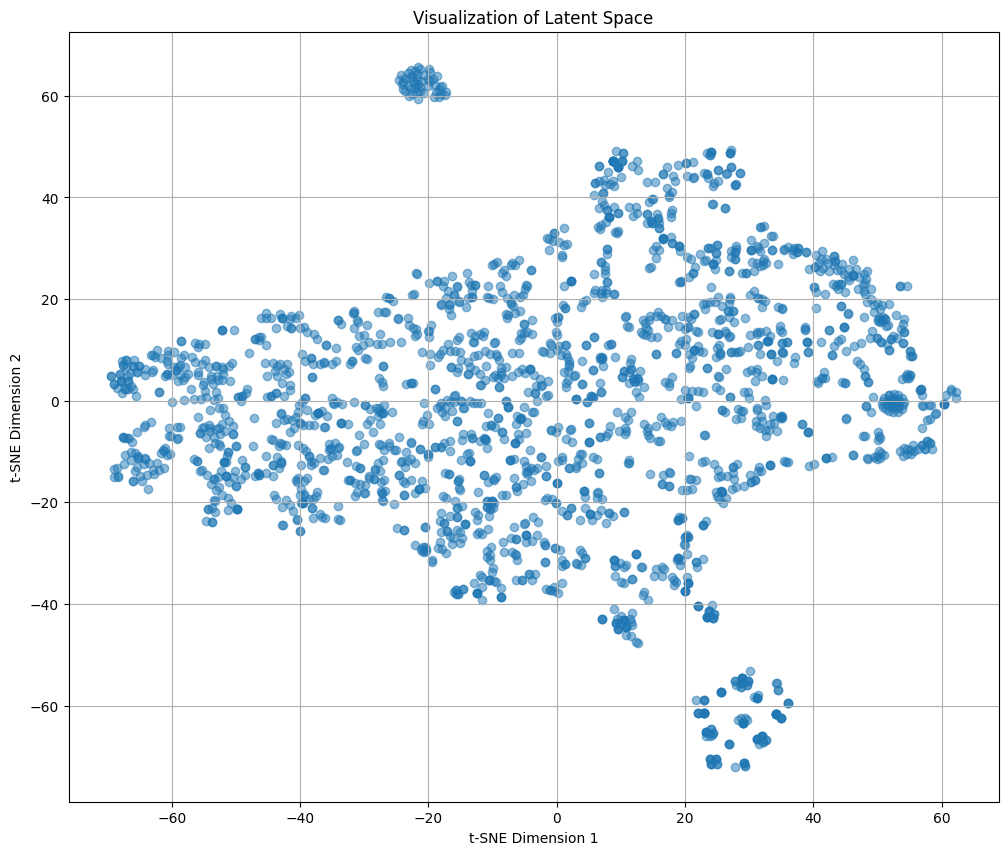

In [ ]:

# Using t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_dim = tsne.fit_transform(latent_vectors)

# Plotting
plt.figure(figsize=(12, 10))
plt.scatter(reduced_dim[:, 0], reduced_dim[:, 1], alpha=0.5)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Visualization of Latent Space")
plt.grid(True)
plt.show()


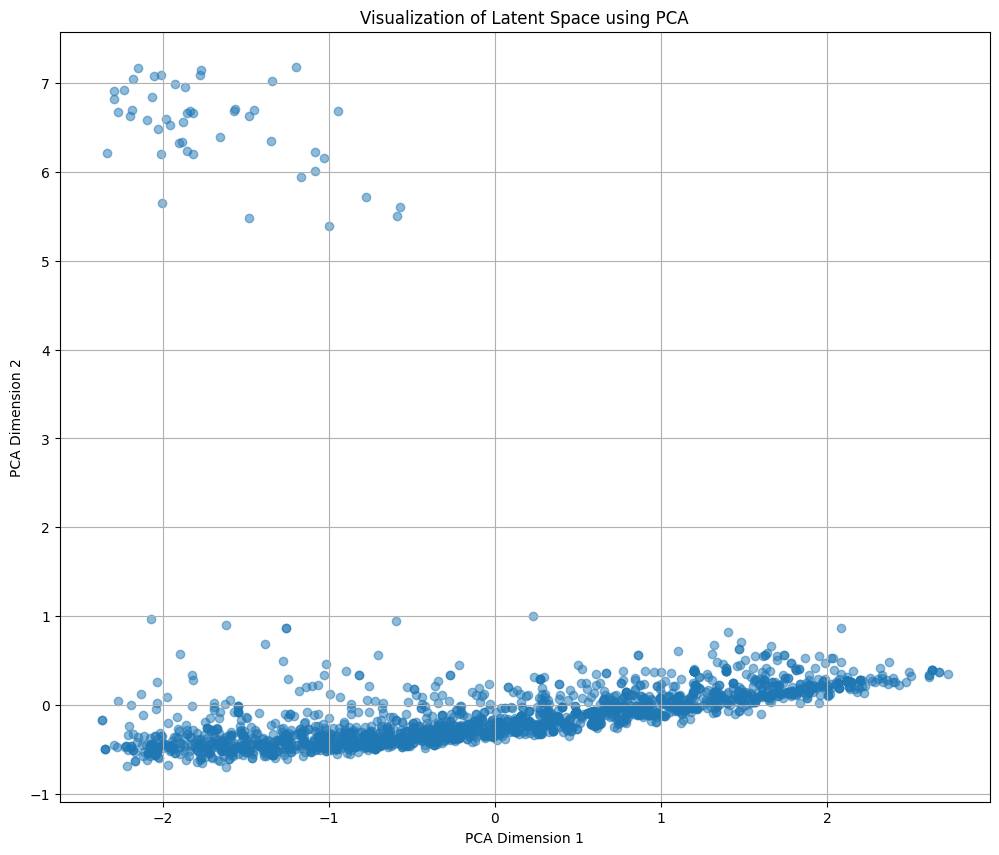

In [ ]:
from sklearn.decomposition import PCA

# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_dim_pca = pca.fit_transform(latent_vectors)

# Plotting
plt.figure(figsize=(12, 10))
plt.scatter(reduced_dim_pca[:, 0], reduced_dim_pca[:, 1], alpha=0.5)
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("Visualization of Latent Space using PCA")
plt.grid(True)
plt.show()


### Generation

In [ ]:
test_encoder_inputs_list = []
test_decoder_inputs_list = []

for batch in test_dataloader:
    encoder_input, decoder_input, _ = batch
    test_encoder_inputs_list.append(encoder_input)
    test_decoder_inputs_list.append(decoder_input)

# Find max sequence length in the test set for encoder and decoder
max_encoder_seq_length = max([t.size(1) for t in test_encoder_inputs_list])
max_decoder_seq_length = max([t.size(1) for t in test_decoder_inputs_list])

# Pad each tensor to the max sequence length
test_encoder_inputs_list = [torch.nn.functional.pad(t, pad=(0,0,0,max_encoder_seq_length - t.size(1))) for t in test_encoder_inputs_list]
test_decoder_inputs_list = [torch.nn.functional.pad(t, pad=(0,0,0,max_decoder_seq_length - t.size(1))) for t in test_decoder_inputs_list]

# Now, you can concatenate
test_encoder_inputs = torch.cat(test_encoder_inputs_list, dim=0)
test_decoder_inputs = torch.cat(test_decoder_inputs_list, dim=0)


In [ ]:
train_rbp_esm_emb_list = []

for batch in train_dataloader:
    _, _, decoder_target = batch
    train_rbp_esm_emb_list.append(decoder_target)

# Find max sequence length in the train set for decoder_target
max_decoder_target_length = max([t.size(1) for t in train_rbp_esm_emb_list])

# Pad each tensor to the max sequence length
train_rbp_esm_emb_list = [torch.nn.functional.pad(t, pad=(0,0,0,max_decoder_target_length - t.size(1))) for t in train_rbp_esm_emb_list]

# Now, you can concatenate
train_rbp_esm_emb = torch.cat(train_rbp_esm_emb_list, dim=0)


In [ ]:
test_rbp_esm_emb_list = []

for batch in test_dataloader:
    _, _, decoder_target = batch
    test_rbp_esm_emb_list.append(decoder_target)

# Find max sequence length in the test set for decoder_target
max_decoder_target_length_test = max([t.size(1) for t in test_rbp_esm_emb_list])

# Pad each tensor to the max sequence length
test_rbp_esm_emb_list = [torch.nn.functional.pad(t, pad=(0,0,0,max_decoder_target_length_test - t.size(1))) for t in test_rbp_esm_emb_list]

# Now, you can concatenate
test_rbp_esm_emb = torch.cat(test_rbp_esm_emb_list, dim=0)


In [ ]:
# generation

In [ ]:
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# 1. Generate Embeddings from the Model
with torch.no_grad():
    generated_rbp_esm_emb = model(test_encoder_inputs.to(device), test_decoder_inputs.to(device)).cpu()


In [ ]:

# 2. Perform PCA on the Embeddings
all_embeddings = torch.cat([train_rbp_esm_emb, test_rbp_esm_emb, generated_rbp_esm_emb], dim=0)


In [ ]:
generated_rbp_esm_emb.shape

torch.Size([555, 599, 1280])

In [ ]:
generated_rbp_esm_emb[1].shape

torch.Size([599, 1280])

In [ ]:
all_embeddings.shape

torch.Size([3326, 599, 1280])

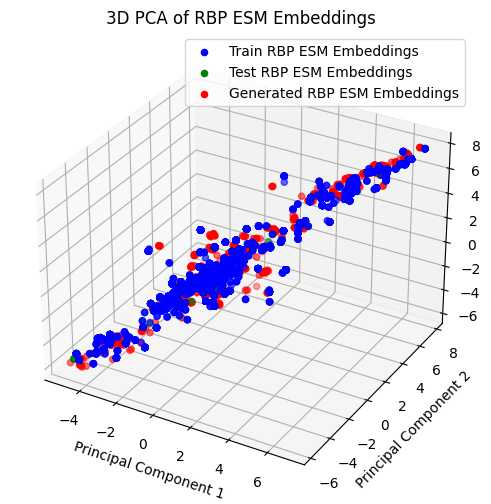

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Initialize PCA
pca = PCA(n_components=3)

# Compute PCA embeddings individually


### generated
reduced_embeddings_list_generated = [torch.tensor(pca.fit_transform(matrix.cpu().numpy())) for matrix in generated_rbp_esm_emb]
reduced_generated = torch.stack(reduced_embeddings_list_generated)
### train
reduced_embeddings_list_train = [torch.tensor(pca.fit_transform(matrix.cpu().numpy())) for matrix in train_rbp_esm_emb]
reduced_train = torch.stack(reduced_embeddings_list_train)
### test
reduced_embeddings_list_test = [torch.tensor(pca.fit_transform(matrix.cpu().numpy())) for matrix in test_rbp_esm_emb]
reduced_test = torch.stack(reduced_embeddings_list_test)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_train[:, 0].numpy().flatten(), reduced_train[:, 1].numpy().flatten(), reduced_train[:, 2].numpy().flatten(), c='blue', label='Train RBP ESM Embeddings')
ax.scatter(reduced_test[:, 0].numpy().flatten(), reduced_test[:, 1].numpy().flatten(), reduced_test[:, 2].numpy().flatten(), c='green', label='Test RBP ESM Embeddings')
ax.scatter(reduced_generated[:, 0].numpy().flatten(), reduced_generated[:, 1].numpy().flatten(), reduced_generated[:, 2].numpy().flatten(), c='red', label='Generated RBP ESM Embeddings')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.legend()
plt.title('3D PCA of RBP ESM Embeddings')
plt.show()


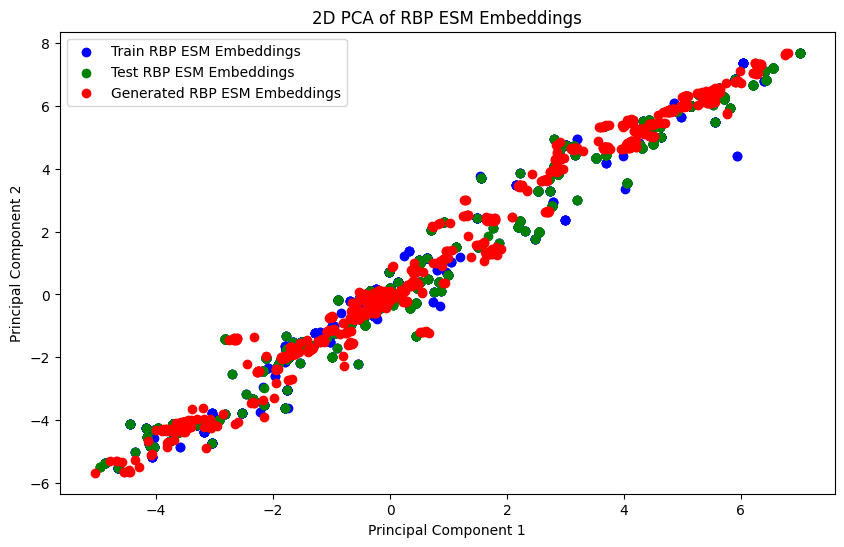

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Compute PCA embeddings individually

### generated
reduced_embeddings_list_generated = [torch.tensor(pca.fit_transform(matrix.cpu().numpy())) for matrix in generated_rbp_esm_emb]
reduced_generated = torch.stack(reduced_embeddings_list_generated)

### train
reduced_embeddings_list_train = [torch.tensor(pca.fit_transform(matrix.cpu().numpy())) for matrix in train_rbp_esm_emb]
reduced_train = torch.stack(reduced_embeddings_list_train)

### test
reduced_embeddings_list_test = [torch.tensor(pca.fit_transform(matrix.cpu().numpy())) for matrix in test_rbp_esm_emb]
reduced_test = torch.stack(reduced_embeddings_list_test)

# Create a 2D scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(reduced_train[:, 0].numpy().flatten(), reduced_train[:, 1].numpy().flatten(), c='blue', label='Train RBP ESM Embeddings')
plt.scatter(reduced_test[:, 0].numpy().flatten(), reduced_test[:, 1].numpy().flatten(), c='green', label='Test RBP ESM Embeddings')
plt.scatter(reduced_generated[:, 0].numpy().flatten(), reduced_generated[:, 1].numpy().flatten(), c='red', label='Generated RBP ESM Embeddings')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.title('2D PCA of RBP ESM Embeddings')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


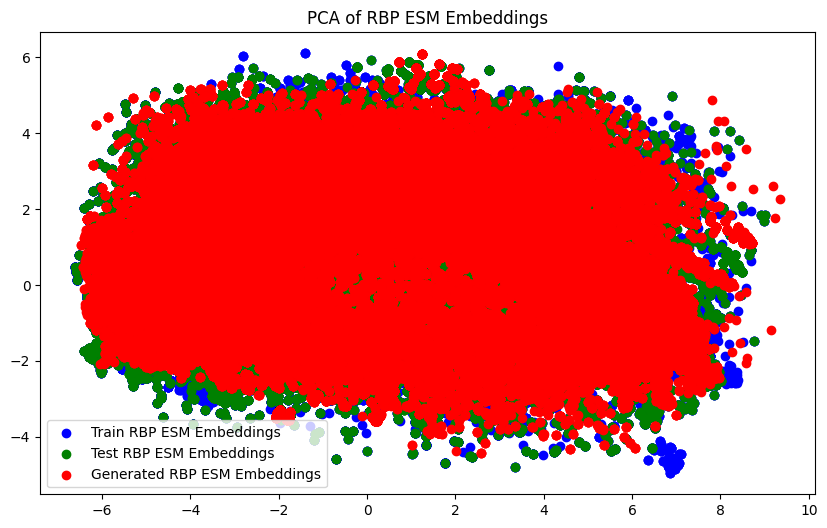

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)

# Loop through the `all_embeddings` tensor, process each matrix with PCA, and collect results
reduced_embeddings_list = [torch.tensor(pca.fit_transform(matrix.cpu().numpy())) for matrix in all_embeddings]

# Convert the list of 2D results into a single tensor for convenience
reduced_embeddings = torch.stack(reduced_embeddings_list)

# Split the reduced embeddings for plotting
train_points, test_points, generated_points = torch.split(reduced_embeddings, [len(train_rbp_esm_emb), len(test_rbp_esm_emb), len(generated_rbp_esm_emb)], dim=0)

# Visualize the PCA Results
plt.figure(figsize=(10, 6))
plt.scatter(train_points[:, :, 0].numpy().flatten(), train_points[:, :, 1].numpy().flatten(), c='blue', label='Train RBP ESM Embeddings')
plt.scatter(test_points[:, :, 0].numpy().flatten(), test_points[:, :, 1].numpy().flatten(), c='green', label='Test RBP ESM Embeddings')
plt.scatter(generated_points[:, :, 0].numpy().flatten(), generated_points[:, :, 1].numpy().flatten(), c='red', label='Generated RBP ESM Embeddings')
plt.legend()
plt.title('PCA of RBP ESM Embeddings')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
plt.show()


### decode generated into AAseqs

In [ ]:
# import pickle
# with open("generated_rbp_esm_emb.pkl", "rb") as f:
#     loaded_generated_rbp_esm_emb = pickle.load(f)


In [ ]:
# loaded_generated_rbp_esm_emb.shape

In [ ]:
generated_rbp_esm_emb.shape

torch.Size([555, 599, 1280])

In [ ]:
generated_rbp_esm_emb[1].shape

torch.Size([599, 1280])

In [ ]:
import pandas as pd
from tqdm import tqdm

In [ ]:
!pip install fair-esm
##setting up ESM
import torch
import esm
esm_model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
esm_model.eval()  # disables dropout for deterministic results
esm_model.cuda() #push model to gpu

ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0-32): 33 x TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
  )
  (contact_head): ContactPredictionHead(
    (regression): Linear(in_features=660, out_features=1, bias=True)
    (activation): Sigmoid()
  )
  (emb_layer_norm_after): LayerNorm((1280,), eps=1

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def embeddings_to_sequence(embeddings, esm_model, alphabet):
    aa_toks = alphabet.all_toks
    aa_idxs = [alphabet.get_idx(aa) for aa in aa_toks]
    embeddings = embeddings.to(device)
    aa_logits = esm_model.lm_head(embeddings)[:, aa_idxs]
    predictions = torch.argmax(aa_logits, dim=-1).tolist()
    generated_peptides = ''.join([aa_toks[pred] for pred in predictions])  # concatenate the amino acids
    return generated_peptides

all_decoded_sequences = []

# Ensure your model is on the correct device
esm_model = esm_model.to(device)

# Loop through each sequence in the batch and decode:
for idx in range(generated_rbp_esm_emb.size(0)):
    single_embedding = generated_rbp_esm_emb[idx].to(device)  # Move the embedding to the same device as the model
    decoded_seq = embeddings_to_sequence(single_embedding, esm_model, alphabet)
    all_decoded_sequences.append(decoded_seq)


In [ ]:
len(all_decoded_sequences[1])

599

In [ ]:
all_decoded_sequences[1]

'MLGPEGGEGFVVKLRGLPWSCSVEDVQNFLSDCTIQDGAAGVHFIYTREGRPSGEAFVELESEDDVKMALKKDRESMGHRYIEVFKSNRTEMDWVLKHSGPNSADSANDGFVRLRGLPFGCSKEEIVQFFSGLEIVPNGITLPVDPEGRPTGEAFVQFASQEIAEKALGKHKERIGHRYIEVFKSSREEVRSYSDPPRKFMSVQRPGPYDRPGTARRPPGIVKQAGLERMRPGAYSTGYGGYEEYSGLSDGYGFTTDLFGRDLSYGLSGMYDGRYGDSEFTVQSTTGHCVHMRGLPYKATENDIYNFFSPLNPVRVHIEIGPDGRVTGEADVEFATHEEAVAAMSKDKANMQHRYIELFLNSTTGASNGAYSSQVMQGMGVSAAQATYSGLESQSVSGGYGAGYSGQNSYGGYDMVSRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR'

In [ ]:
import pandas as pd

In [ ]:
df_decoded_sequences = pd.DataFrame({
    'Decoded_Sequences': all_decoded_sequences
})

In [ ]:
df_decoded_sequences

,Decoded_Sequences
0,ASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDT...
1,MLGPEGGEGFVVKLRGLPWSCSVEDVQNFLSDCTIQDGAAGVHFIY...
2,GSVSNQQPAGGSAKAAEEAPEEAPEDAARAADEPQLLHGAGVCKFF...
3,SGGGRGRGPAGNNDCRIYVGNLPPDIRTKDIEDVFGKYGRIRDIDL...
4,EDESPKTLYVGNLSRDVTEALILQLFSQIGPVKNCKMIRDRAGNRP...
...,...
550,SGGGRGRGPAGNNDCRIYVGNLPPDIRTKDIEDVFGKYGRIRDIDL...
551,DTGVIEGGLNVTLTIRLLMHGKEVGSIIGKKGESVKKMREESGARI...
552,SRYGRYGGETKVYVGNLGTGATKRELERAFSRYGRLRDVWIARNPP...
553,SNKLYIGNLSPDVTEDDLRQLFEDRKLPLAGQVLLKSGYAFVDYPD...


In [ ]:
df_decoded_sequences.to_csv('generated_rbp_test_set_run4-scl.csv')

In [ ]:
count = df_decoded_sequences[df_decoded_sequences['Decoded_Sequences'].str.startswith('M')].shape[0]
print(count)

43


### old model codes

In [ ]:
!pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.6 MB/s eta 0:00:00


In [ ]:
import transformers

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoModel, AutoTokenizer, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm


In [ ]:
data.columns

Index(['Gene_name', 'Gene_id', 'Motif', 'RBP_sequence', 'rna_motif_emb',
       'rbp_esm_emb'],
      dtype='object')

In [ ]:
type(data['rna_motif_emb'][0])

numpy.ndarray

In [ ]:
!pip install sentencepiece
import sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, AdamW
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import sentencepiece as spm


# Dataset
class RnaToProteinDataset(Dataset):
    def __init__(self, rna_embeddings, protein_sequences, tokenizer):
        self.rna_embeddings = rna_embeddings
        self.protein_sequences = protein_sequences
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.rna_embeddings)

    def __getitem__(self, idx):
        rna_emb = self.rna_embeddings[idx]
        protein_tokenized = self.tokenizer.encode_plus(self.protein_sequences[idx], return_tensors="pt", padding="max_length", truncation=True, max_length=128)
        return {
            'rna_emb': rna_emb,
            'protein_input_ids': protein_tokenized['input_ids'].squeeze(),
            'protein_attention_mask': protein_tokenized['attention_mask'].squeeze()
        }


# Attention Mechanism
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim * 2, hidden_dim)
        self.v = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        # hidden = [batch size, hidden dim]
        # encoder_outputs = [src len, batch size, hidden dim]

        batch_size = encoder_outputs.shape[1]
        src_len = encoder_outputs.shape[0]

        # Repeat hidden state and encoder outputs for the respective calculations
        hidden_repeated = hidden.unsqueeze(1).repeat(1, src_len, 1)
        encoder_outputs_repeated = encoder_outputs.permute(1, 0, 2)

        energy = torch.tanh(self.attn(torch.cat((hidden_repeated, encoder_outputs_repeated), dim=2)))
        attention = self.v(energy).squeeze(2)
        return nn.functional.softmax(attention, dim=1)



class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1, dropout=0.1):
        super(Encoder, self).__init__()
        self.rnn = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(hidden_dim)

    def forward(self, x):
        outputs, (hidden, cell) = self.rnn(x)
        outputs = self.dropout(outputs)
        normalized_hidden = self.layer_norm(hidden.squeeze(0))
        return outputs, normalized_hidden, cell


# Decoder with Attention
class DecoderWithAttention(nn.Module):
    def __init__(self, output_dim, emb_dim, hidden_dim, dropout, attention):
        super(DecoderWithAttention, self).__init__()
        self.output_dim = output_dim
        self.attention = attention
        self.rnn = nn.LSTM(emb_dim + hidden_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell, encoder_outputs):
        # Expand the dimension of input for embedding
        input = input.unsqueeze(0)
        embedded = self.dropout(input)

        # Calculate attention weights
        a = self.attention(hidden, encoder_outputs)

        # Use attention weights to get a weighted combination of encoder outputs
        a = a.unsqueeze(1)
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        weighted = torch.bmm(a, encoder_outputs)

        # Ensure 'weighted' has shape [1, batch size, hidden_dim]
        weighted = weighted.permute(1, 0, 2)

        # Concatenate 'embedded' and 'weighted' along dimension 2
        rnn_input = torch.cat((embedded, weighted), dim=2)

        output, (hidden, cell) = self.rnn(rnn_input, (hidden, cell))

        # Get the prediction from the RNN's output
        prediction = self.fc_out(output.squeeze(0))

        return prediction, hidden, cell


# Seq2Seq Model
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg):
        trg_len = trg.shape[0]
        batch_size = trg.shape[1]
        trg_vocab_size = self.decoder.output_dim
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        encoder_outputs, hidden, cell = self.encoder(src)
        input = trg[0, :]
        for t in range(1, trg_len):
            output, hidden, cell = self.decoder(input, hidden, cell, encoder_outputs)
            outputs[t] = output
            input = output.argmax(1)
        return outputs

# Hyperparameters
BATCH_SIZE = 12
EPOCHS = 10
LR = 0.001
ENCODER_INPUT_DIM = data['rna_motif_emb'].iloc[0].shape[1] #(11,120)
DECODER_OUTPUT_DIM = 512  #according to `ProtT5`?
HIDDEN_DIM = 512
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
ENCODER_INPUT_DIM

120

In [ ]:
# # Initialize tokenizer and model components
# from transformers import T5Tokenizer, T5Model
# import re
# import torch
# tokenizer = T5Tokenizer.from_pretrained('Rostlab/prot_t5_xl_bfd', do_lower_case=False)
# model = T5Model.from_pretrained("Rostlab/prot_t5_xl_bfd")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data._utils.collate import default_collate

def collate_fn(batch):
    rna_seqs = [torch.tensor(item['rna_emb'], dtype=torch.float32) for item in batch]
    rna_padded = pad_sequence(rna_seqs, batch_first=True, padding_value=0) # Assuming you want batch-first tensors

    # Replace original rna sequences with the padded sequences
    for i, item in enumerate(batch):
        item['rna_emb'] = rna_padded[i]

    return default_collate(batch)


In [ ]:
attn = Attention(HIDDEN_DIM)
encoder = Encoder(ENCODER_INPUT_DIM, HIDDEN_DIM)
decoder = DecoderWithAttention(DECODER_OUTPUT_DIM, HIDDEN_DIM, HIDDEN_DIM, 0.1, attn)
model = Seq2Seq(encoder, decoder, device).to(device)

# Dataset and DataLoader
dataset = RnaToProteinDataset(data['rna_motif_emb'].tolist(), data['RBP_sequence'].tolist(), tokenizer)
train_data, test_data = train_test_split(dataset, test_size=0.1, random_state=42)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=LR)

# Training Loop
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0.0

    for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}"):
        src, trg = batch['rna_emb'], batch['protein_input_ids']
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()
        src = src.float()
        trg = trg.float()
        output = model(src, trg)
        output_dim = output.shape[-1]
        output = output[1:].view(-1, output_dim)
        trg = trg[1:].view(-1)
        loss = criterion(output, trg)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(train_dataloader)}")


Training Epoch 1:   0%|          | 0/244 [00:00<?, ?it/s]


RuntimeError: ignored